# B20-03 Lev Kozlov

[Github link](https://github.com/lvjonok/s23-sensors/blob/master/hw4.ipynb)

# Task 1

- Generate 2D noisy dataset
- detect line parameters using Hough Transform
- Visualize results

In [40]:
!pip3 install scikit-image

In [1]:
import numpy as np

t = np.array(list(range(300)))
# y = ax + b
# a = 0.2
# b = 3

y = 0.2 * t + 3

# add noise
dataset = np.array([t, y])
dataset_noisy = dataset + np.array([[-0.2], [1]]) * np.random.normal(0, 4, y.shape)

# snap dataset_noisy to integers

dataset_noisy = np.array(dataset_noisy, dtype=np.int64)


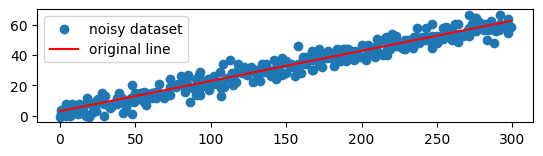

In [2]:
import matplotlib.pyplot as plt

ax = plt.subplot()
ax.set_aspect('equal')
ax.scatter(dataset_noisy[0], dataset_noisy[1], label='noisy dataset')
ax.plot(dataset[0], dataset[1], label='original line', color='red')
ax.legend()

In [3]:
ymin = np.min(dataset_noisy[1])
ymax = np.max(dataset_noisy[1])
xmin = np.min(dataset_noisy[0])
xmax = np.max(dataset_noisy[0])

image = np.zeros((xmax - xmin + 1, ymax - ymin + 1))

for (x, y) in dataset_noisy.T:
    image[x - xmin, y - ymin] = 255

### Reference: [source](https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html)

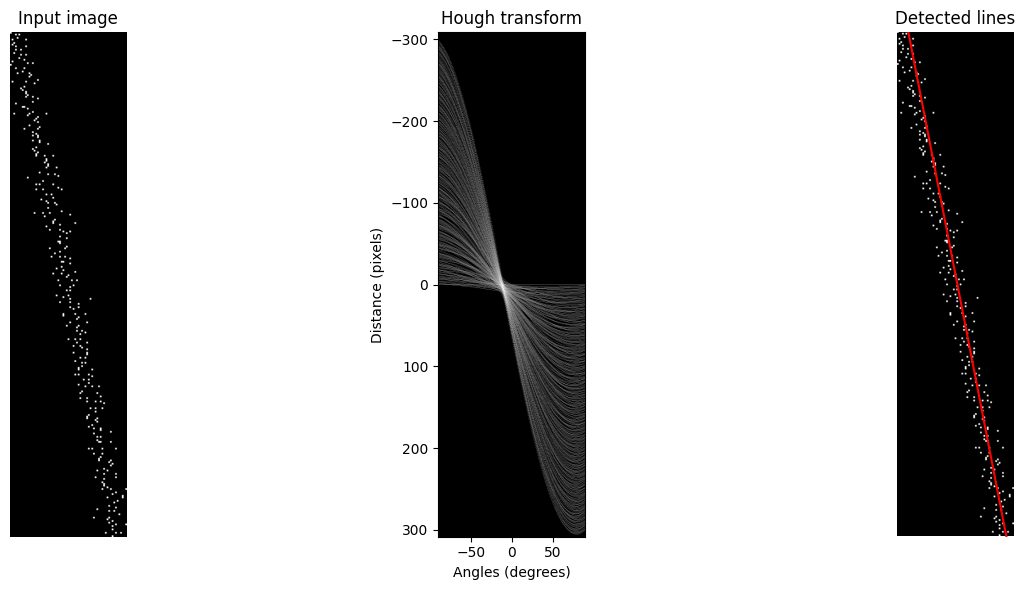

In [4]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360, endpoint=False)
h, theta, d = hough_line(image, theta=tested_angles)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), color='red')

plt.tight_layout()
plt.show()

As I tested it works bad with increase of noise: predicts many lines where there is only one. But, overall, task is acomplished.

# Task 2

- record 2D LIDAR dataset in a room environment
- detect walls in 2D map using Hough transform
- visualize results


### Lidar setup in gazebo

![Alt text](hw4/lidar_gazebo2.png)

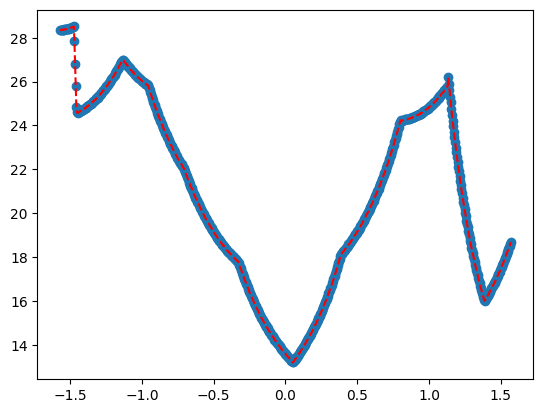

In [6]:
ranges = np.loadtxt('hw4/ranges2.txt')
angles = np.arange(start=-1.570796012878418, stop=1.570796012878418, step =0.0043693906627595425)

plt.scatter(angles, ranges)
plt.plot(angles, ranges, linestyle='dashed', color='red')

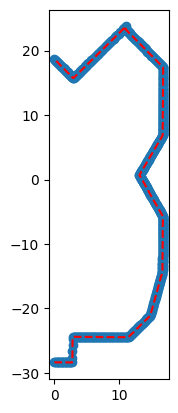

In [7]:
x, y = np.cos(angles) * ranges, np.sin(angles) * ranges

ax = plt.subplot()
ax.set_aspect('equal')
ax.scatter(x, y)
ax.plot(x, y, linestyle='dashed', color='red')

In [8]:
# we may discretize the whole map with precision 0.01m

x_int = np.array(x / 0.1, dtype=np.int64)
y_int = np.array(y / 0.1, dtype=np.int64)

(-8.4, 176.4, -309.0, 263.0)

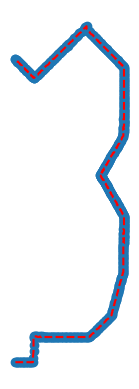

In [9]:
ax = plt.subplot()
ax.set_aspect('equal')
ax.scatter(x_int, y_int)
ax.plot(x_int, y_int, linestyle='dashed', color='red')
ax.axis('off')

In [12]:
ymin = np.min(y_int) - 10
ymax = np.max(y_int) + 10
xmin = np.min(x_int) - 10
xmax = np.max(x_int) + 10

image = np.zeros((xmax - xmin + 1, ymax - ymin + 1))

for (xi, yi) in np.array([x_int, y_int]).T:
    image[xi - xmin, yi - ymin] = 255

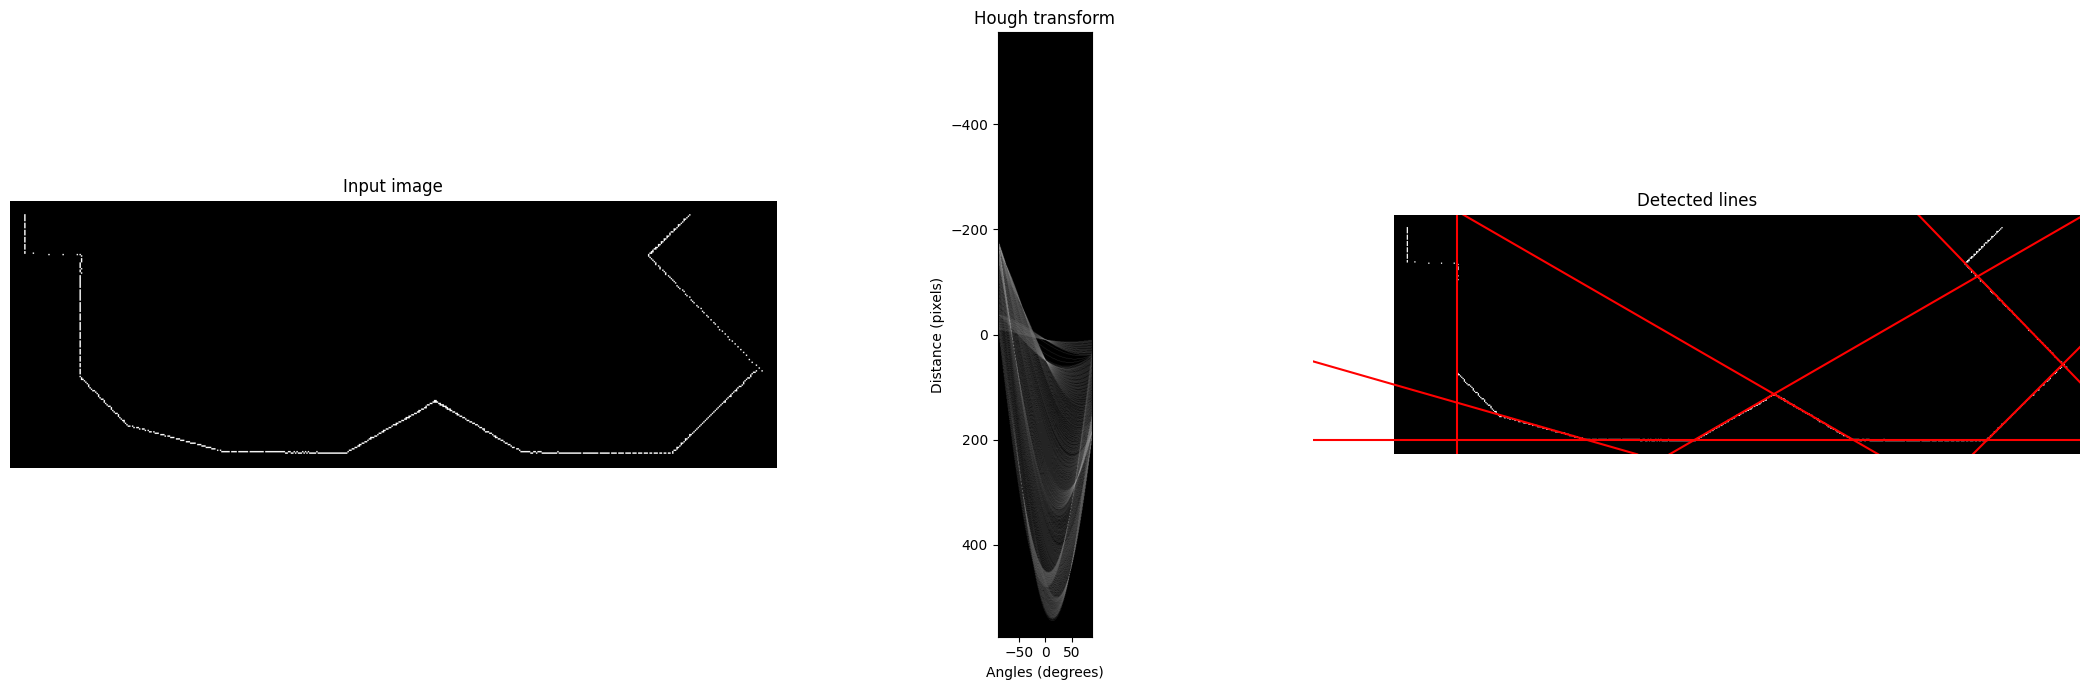

In [26]:
import numpy as np

from skimage.transform import hough_line, hough_line_peaks
from skimage.feature import canny
from skimage.draw import line as draw_line
from skimage import data

import matplotlib.pyplot as plt
from matplotlib import cm

h, theta, d = hough_line(image)

fig, axes = plt.subplots(1, 3, figsize=(21, 7))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

angle_step = 0.5 * np.diff(theta).mean()
d_step = 0.5 * np.diff(d).mean()
bounds = [np.rad2deg(theta[0] - angle_step),
          np.rad2deg(theta[-1] + angle_step),
          d[-1] + d_step, d[0] - d_step]
ax[1].imshow(np.log(1 + h), extent=bounds, cmap=cm.gray, aspect=1 / 1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for _, angle, dist in zip(*hough_line_peaks(h, theta, d, threshold=40)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), color='red')

plt.tight_layout()
plt.savefig('hw4/result.png')
plt.show()


## I cannot say that it is really result I intended to obtain, but algorithm detect lines which form a wall

As further work we might find their intersections and try to reduce to line segments.